## Tipos de Plots - Matplotlib

Existem muitos outros estilos de plotagem disponíveis além do gráfico de linha padrão, todos os quais podem ser acessados passando a palavra-chave `kind` para` plot () `. A lista completa de plots disponíveis é a seguinte:

- `bar` para gráficos de barra vertical
- `barh` para gráficos de barra horizontal
- `hist` para histograma
- `box` para boxplot
- `kde` ou` density` para gráficos de densidade
- `area` para parcelas de área
- `pie` para gráficos de pizza
- `scatter` para gráficos de dispersão

In [28]:
# estamos usando o back-end inline
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [29]:
import numpy as np 
import pandas as pd 

In [30]:
dfCanada = pd.read_excel('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx', sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2)
dfCanada.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
dfCanada.columns = list(map(str, dfCanada.columns))

dfCanada['Total'] = dfCanada.sum(axis=1)

In [31]:
dfCanada.set_index('Country', inplace=True)


In [32]:
dfCanada.head()

,Type,Coverage,AREA,Continent,REG,Region,DEV,DevName,1980,1981,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,65977
Albania,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,0,...,1223,856,702,560,716,561,539,620,603,18433
Algeria,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,80,67,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,72156
American Samoa,Immigrants,Foreigners,909,Oceania,957,Polynesia,902,Developing regions,0,1,...,0,1,0,0,0,0,0,0,0,2774
Andorra,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,0,0,...,0,1,1,0,0,0,0,1,1,2749


In [33]:
years = list(map(str, range(1980, 2014)))

## hist

Um histograma é uma forma de representar a distribuição _frequency_ do conjunto de dados numéricos. A maneira como funciona é que particiona o eixo x em _bins_, atribui cada ponto de dados em nosso conjunto de dados a um bin e, em seguida, conta o número de pontos de dados que foram atribuídos a cada bin. Portanto, o eixo y é a frequência ou o número de pontos de dados em cada compartimento. Observe que podemos alterar o tamanho do compartimento e geralmente é necessário ajustá-lo para que a distribuição seja exibida bem.

In [34]:
dfCanada['2013'].head()

Country
Afghanistan       2004
Albania            603
Algeria           4331
American Samoa       0
Andorra              1
Name: 2013, dtype: int64

In [35]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(dfCanada['2013'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


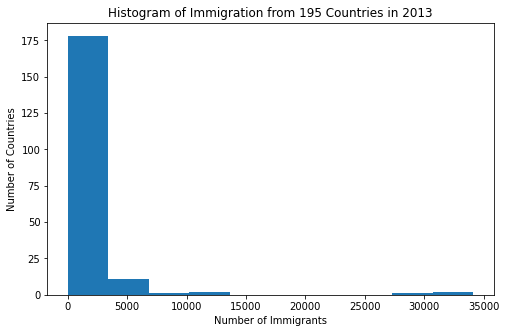

In [36]:
dfCanada['2013'].plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of Immigration from 195 Countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

<AxesSubplot:ylabel='Frequency'>

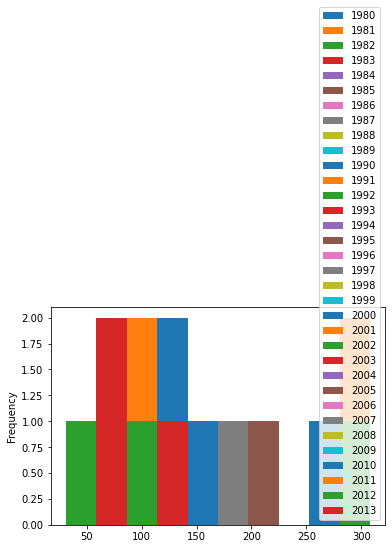

In [37]:
dfCanada.loc[['Denmark', 'Norway', 'Sweden'], years].plot.hist()

Não se preocupe, você frequentemente se deparará com situações como essa ao criar plotagens. A solução geralmente está em como o conjunto de dados subjacente é estruturado.

Em vez de traçar a distribuição de freqüência da população da população para os 3 países, o _pandas_ em vez disso traçou a distribuição de freqüência da população para os `anos '.

Isso pode ser facilmente corrigido primeiro transpondo o conjunto de dados e, em seguida, plotando como mostrado abaixo.

In [38]:
# transpose dataframe
df_t = dfCanada.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


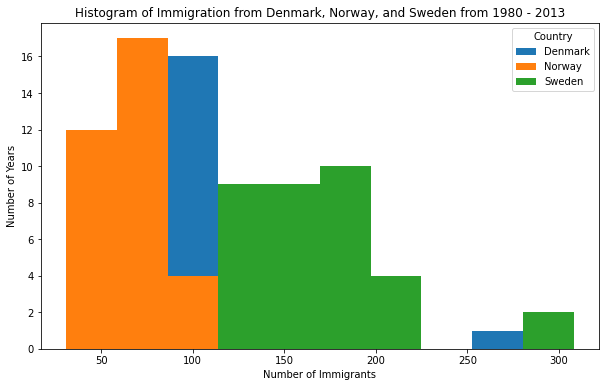

In [39]:
# generate histogram
df_t.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

Vamos fazer algumas modificações para melhorar o impacto e a estética do enredo anterior:

- aumente o tamanho da caixa para 15 passando o parâmetro `bins`
- defina a transparência para 60% passando o parâmetro `alpha`
- rotular o eixo x passando o parâmetro `x-label`
- alterar as cores dos gráficos passando o parâmetro `color`

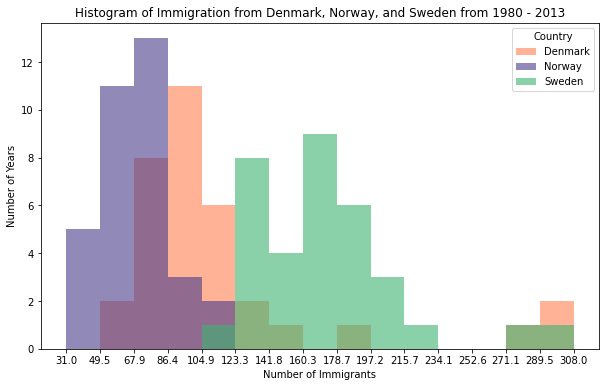

In [40]:
# let's get the x-tick values
count, bin_edges = np.histogram(df_t, 15)

# un-stacked histogram
df_t.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

## kde

Além do histograma, temos também o gráfico da densidade de uma feature (kde plot — kernel density estimation plot). Esse gráfico é uma versão “suavizada” do histograma. Note que o eixo y mostra uma estimativa da frequência relativa de cada valor. Em termos probabilísticos, trata-se de uma estimativa da função densidade de probabilidade da feature.

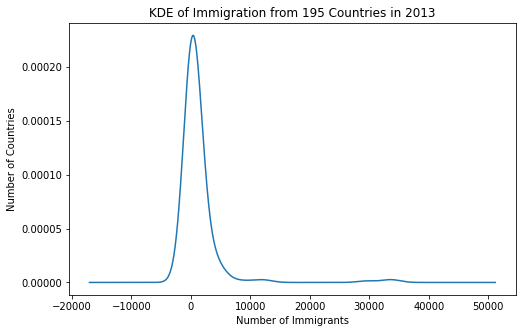

In [41]:
dfCanada['2013'].plot(kind='kde', figsize=(8, 5))

plt.title('KDE of Immigration from 195 Countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

## bar e barh

Um gráfico de barra é uma forma de representar dados onde o _comprimento_ das barras representa a magnitude / tamanho do recurso / variável. Os gráficos de barras geralmente representam variáveis numéricas e categóricas agrupadas em intervalos.

Para criar um gráfico de barra, podemos passar um de dois argumentos por meio do parâmetro `kind` em` plot () `:

- `kind = bar` cria um gráfico de barra _vertical_
- `kind = barh` cria um gráfico de barra _horizontal_

**Gráfico de barra vertical**

Em gráficos de barras verticais, o eixo x é usado para rotular, e o comprimento das barras no eixo y corresponde à magnitude da variável que está sendo medida. Os gráficos de barras verticais são particularmente úteis na análise de dados de séries temporais. Uma desvantagem é que eles não têm espaço para rotular o texto ao pé de cada barra.

In [42]:
df_iceland = dfCanada.loc['Brazil', years]
df_iceland.head()

1980    211
1981    220
1982    192
1983    139
1984    145
Name: Brazil, dtype: object

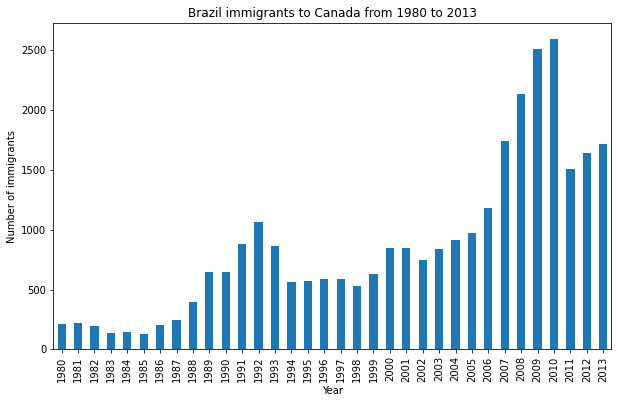

In [43]:
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Brazil immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

**Gráfico de barra horizontal**

Às vezes, é mais prático representar os dados horizontalmente, especialmente se você precisar de mais espaço para rotular as barras. Em gráficos de barras horizontais, o eixo y é usado para rotular, e o comprimento das barras no eixo x corresponde à magnitude da variável que está sendo medida. Como você verá, há mais espaço no eixo y para rotular variáveis categóricas.

In [44]:
# sort dataframe on 'Total' column (descending)
dfCanada.sort_values(by='Total', ascending=True, inplace=True)

# get top 15 countries
df_top15 = dfCanada['Total'].tail(15)
df_top15

Country
Romania                                                  96317
Viet Nam                                                 99903
Jamaica                                                 109152
France                                                  111826
Lebanon                                                 118118
Poland                                                  141973
Republic of Korea                                       145324
Sri Lanka                                               155696
Iran (Islamic Republic of)                              183261
United States of America                                243833
Pakistan                                                248938
Philippines                                             514148
United Kingdom of Great Britain and Northern Ireland    554233
China                                                   662705
India                                                   699242
Name: Total, dtype: int64

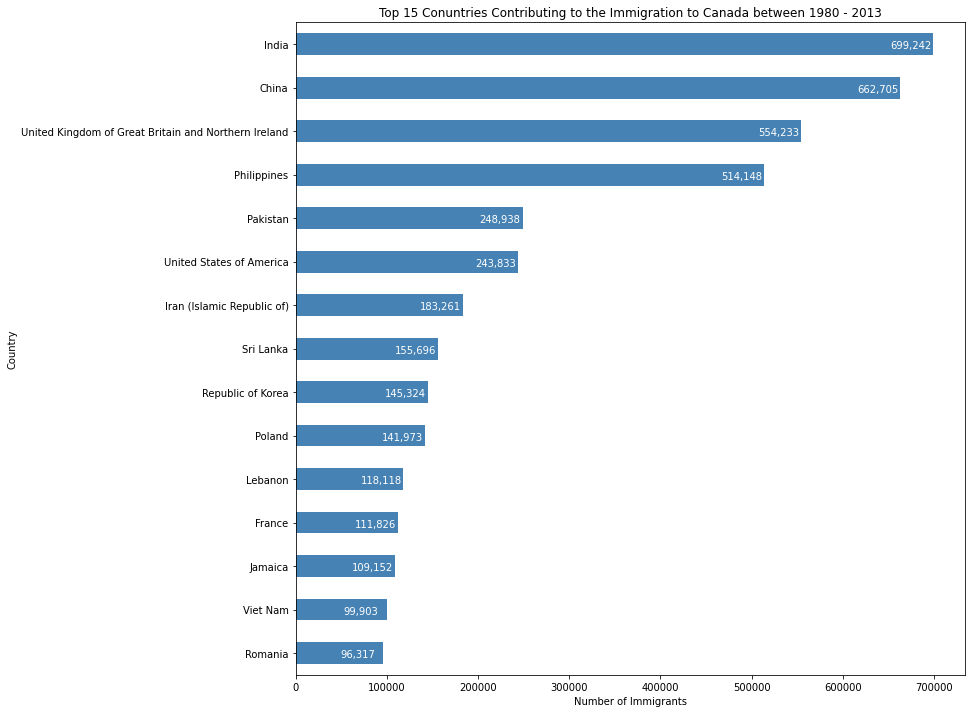

In [45]:
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

# annotate value labels to each country
for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # format int with commas

    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')

plt.show()

## area

Um gráfico de área é um gráfico de linhas, onde a área entre a linha e o eixo é sombreada com uma cor. Estes gráficos normalmente são utilizados para representar os totais acumulados ao longo do tempo e são a forma convencional de exibir as linhas empilhadas.

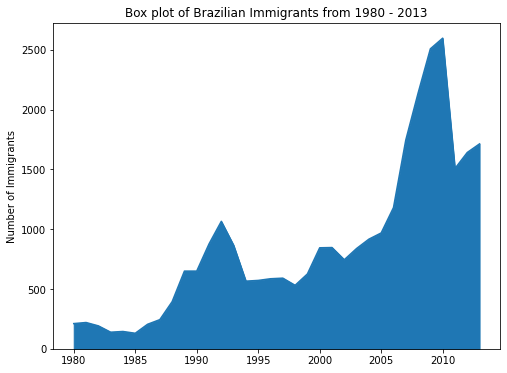

In [46]:

df_iceland.plot(kind='area', figsize=(8, 6))
plt.title('Box plot of Brazilian Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')
plt.show()

## box

Um `box plot` é uma forma de representar estatisticamente a _distribuição_ dos dados por meio de cinco dimensões principais:

- ** Mínimo: ** Menor número no conjunto de dados excluindo os outliers.
- ** Primeiro quartil: ** Número médio entre o `mínimo` e a` mediana`.
- ** Segundo quartil (Mediana): ** Número do meio do conjunto de dados (classificado).
- ** Terceiro quartil: ** Número médio entre `mediana` e` máximo`.
- ** Máximo: ** Número mais alto no conjunto de dados, excluindo os outliers.

Para fazer um `box plot`, podemos usar` kind = box` no método `plot` invocado em uma série _pandas_ ou dataframe.

Vamos traçar o boxplot para os imigrantes japoneses entre 1980 e 2013.

In [47]:
years = list(map(str, range(1980, 2014)))

In [48]:
df_japan = dfCanada.loc[['Japan'], years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


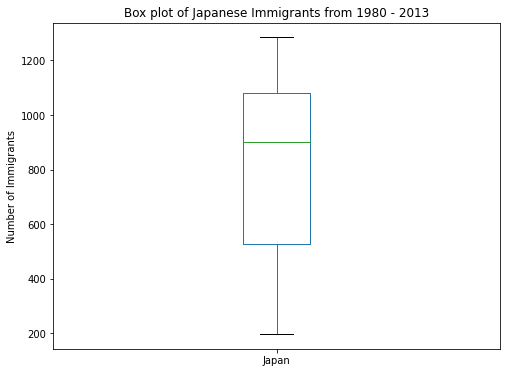

In [49]:
df_japan.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

## pie

Um `pie chart` é um gráfico circular que exibe proporções numéricas dividindo um círculo (ou pizza) em fatias proporcionais. Provavelmente, você já está familiarizado com os gráficos de pizza, pois eles são amplamente usados nos negócios e na mídia. Podemos criar gráficos de pizza no Matplotlib passando a palavra-chave `kind = pie`.

Vamos usar um gráfico de pizza para explorar a proporção (porcentagem) de novos imigrantes agrupados por continentes em todo o período de 1980 a 2013.

    Exemplo de uso:

In [50]:
# agrupando por continentes
df_continents = dfCanada.groupby('Continent', axis=0).sum()
df_continents.head(2)

,AREA,REG,DEV,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,48762,49242,48708,3951,4363,3819,2671,2639,2650,3782,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,765660
Asia,45815,109147,44197,31025,34314,30214,24696,27274,23850,28739,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3516953


Vamos passar a palavra-chave `kind = 'pie'`, junto com os seguintes parâmetros adicionais:

- `autopct` - é uma string ou função usada para rotular as fatias com seu valor numérico. Se for uma string de formato, o rótulo será `fmt% pct`.
- `startangle` - gira o início do gráfico de pizza em graus de ângulo no sentido anti-horário a partir do eixo x.
- `shadow` - Desenha uma sombra abaixo da pizza (para dar uma sensação 3D).

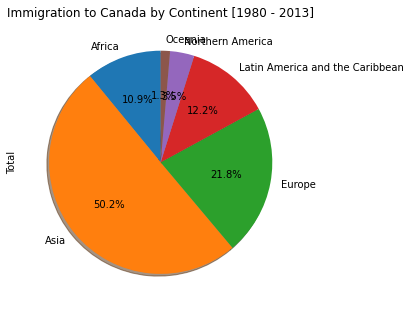

In [51]:
# autopct create %, start angle represent starting point
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
#plt.axis('equal') # Sets the pie chart to look like a circle.
plt.show()

O visual acima não é muito claro, os números e o texto se sobrepõem em alguns casos. Vamos fazer algumas modificações para melhorar o visual:

- Remover os rótulos de texto no gráfico de pizza passando `legend` e adicione-o como uma legenda separada usando` plt.legend() `.
- Empurrar as porcentagens para ficar fora do gráfico de pizza, passando o parâmetro `pctdistance`.
- Passar um conjunto personalizado de cores para continentes, passando o parâmetro `colors`.
- ** Explodir ** o gráfico de pizza para enfatizar os três continentes mais baixos (África, América do Norte e América Latina e Caribe) inserindo o parâmetro `explode`.

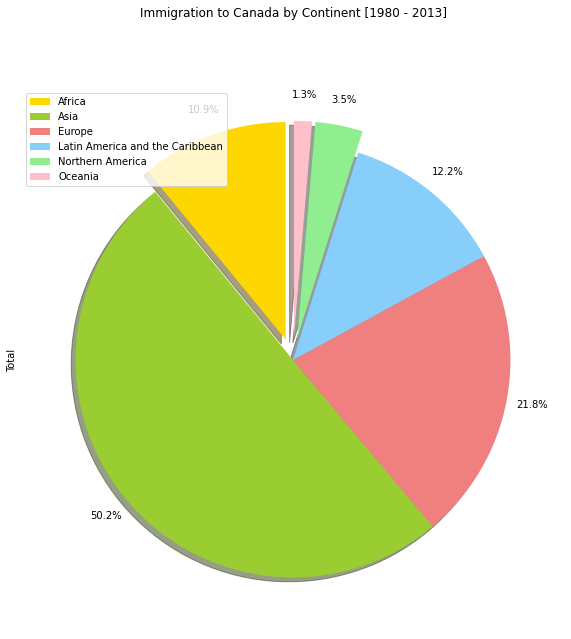

In [52]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(10, 10),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

#plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

## scatter

Um `gráfico de dispersão` (2D) é um método útil de comparar variáveis umas com as outras. Os gráficos `Scatter` parecem semelhantes aos` gráficos lineares` no sentido de que ambos mapeiam variáveis independentes e dependentes em um gráfico 2D. Embora os pontos de dados estejam conectados por uma linha em um gráfico de linha, eles não estão conectados em um gráfico de dispersão. Os dados em um gráfico de dispersão são considerados para expressar uma tendência. Com análises adicionais usando ferramentas como regressão, podemos calcular matematicamente essa relação e usá-la para prever tendências fora do conjunto de dados.

In [59]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(dfCanada[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


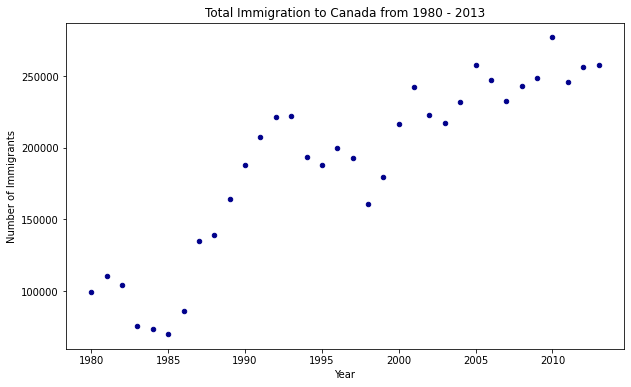

In [60]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')
plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

## bubble

Um `gráfico de bolhas` é uma variação do` gráfico de dispersão` que exibe três dimensões de dados (x, y, z). Os pontos de dados são substituídos por bolhas, e o tamanho da bolha é determinado pela terceira variável 'z', também conhecida como peso. Em `maplotlib`, podemos passar um array ou escalar para a palavra-chave` s` para `plot ()`, que contém o peso de cada ponto.

In [55]:
df_can_t = dfCanada[years].transpose() # transposed dataframe
df_can_t.index = map(int, df_can_t.index)
df_can_t.index.name = 'Year'
df_can_t.reset_index(inplace=True)
df_can_t.head()

Country,Year,Western Sahara,Sao Tome and Principe,Canada,San Marino,New Caledonia,Andorra,Vanuatu,Monaco,Palau,...,Poland,Republic of Korea,Sri Lanka,Iran (Islamic Republic of),United States of America,Pakistan,Philippines,United Kingdom of Great Britain and Northern Ireland,China,India
0,1980,0,0,0,1,0,0,0,0,0,...,863,1011,185,1172,9378,978,6051,22045,5123,8880
1,1981,0,0,0,0,0,0,0,0,0,...,2930,1456,371,1429,10030,972,5921,24796,6682,8670
2,1982,0,0,0,0,0,0,0,0,0,...,5881,1572,290,1822,9074,1201,5249,20620,3308,8147
3,1983,0,0,0,0,0,0,0,0,0,...,4546,1081,197,1592,7100,900,4562,10015,1863,7338
4,1984,0,0,0,0,0,0,0,0,0,...,3588,847,1086,1977,6661,668,3801,10170,1527,5704


In [56]:
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())


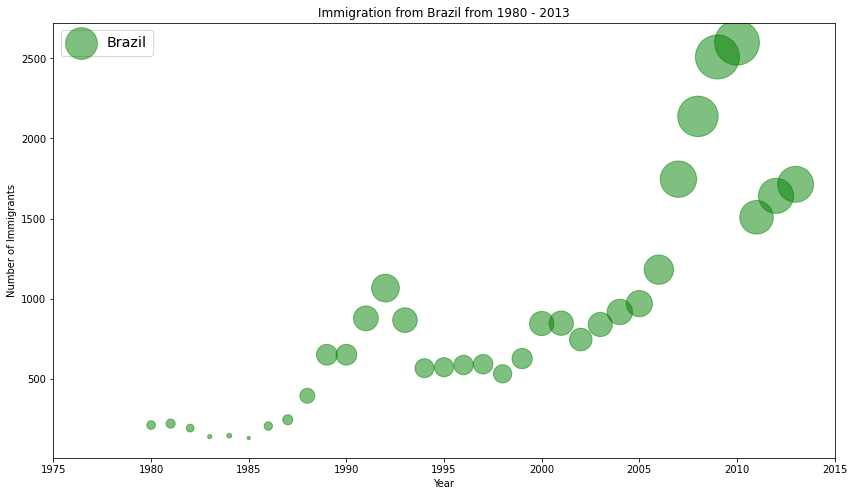

In [57]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil from 1980 - 2013')
ax0.legend(['Brazil'], loc='upper left', fontsize='x-large')

O tamanho da bolha corresponde à magnitude da população imigrante naquele ano, em comparação com os dados de 1980 a 2013. Quanto maior a bolha, mais imigrantes naquele ano.

No gráfico acima, podemos ver um aumento correspondente na imigração da Argentina durante a grande depressão de 1998-2002. Também podemos observar um pico semelhante por volta de 1985 a 1993. Na verdade, a Argentina sofreu uma grande depressão de 1974 a 1990, pouco antes do início da grande depressão de 1998 a 2002.

Em uma nota semelhante, o Brasil sofreu o _Efeito Samba_ onde o real (moeda) brasileiro caiu quase 35% em 1999. Havia o temor de uma crise financeira na América do Sul, já que muitos países sul-americanos eram fortemente dependentes das exportações industriais do Brasil. O governo brasileiro posteriormente adotou um programa de austeridade e a economia se recuperou lentamente ao longo dos anos, culminando em um aumento repentino em 2010. Os dados de imigração refletem esses eventos.


### Subplots

Freqüentemente, podemos querer plotar vários gráficos dentro da mesma figura. Por exemplo, podemos desejar realizar uma comparação lado a lado do gráfico de caixa com o gráfico de linha da imigração da China e da Índia.

Para visualizar vários gráficos juntos, podemos criar uma ** `figura` ** (tela geral) e dividi-lo em **` subplots` **, cada um contendo um gráfico. Com ** subplots **, geralmente trabalhamos com a ** camada de artista ** em vez da ** camada de script **.

A sintaxe típica é: <br>

```python
    fig = plt.figure () # criar figura
    ax = fig.add_subplot (nrows, ncols, plot_number) # criar subplots
```

Onde

- `nrows` e` ncols` são usados ​​para dividir a figura em subeixos (`nrows` *` ncols`),
- `plot_number` é usado para identificar o subplot particular que esta função deve criar dentro da grade nocional. `plot_number` começa em 1, incrementa nas linhas primeiro e tem um máximo de` nrows` * `ncols` como mostrado abaixo.


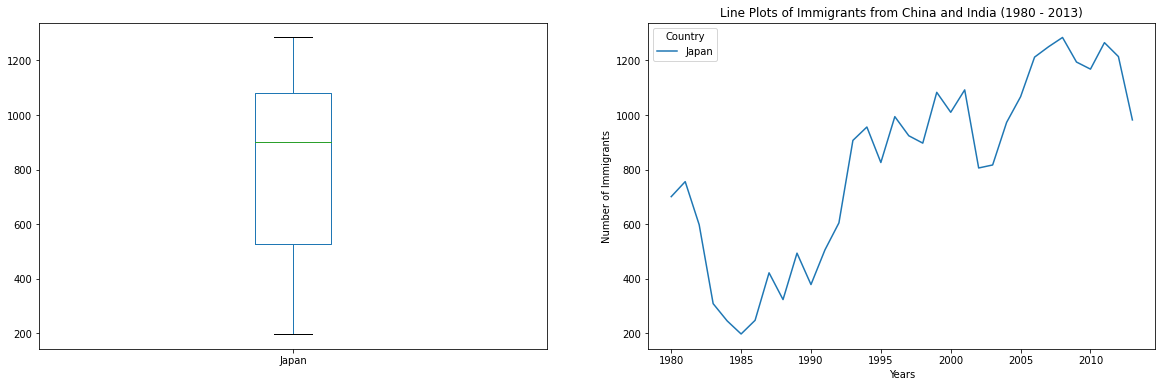

In [58]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot)

# Subplot 1: Box plot

df_japan.plot(kind='box', figsize=(20, 6), ax=ax0)
plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')


# Subplot 2: Line plot
df_japan.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()